In [48]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
plot_root = '../../plots/renewable_paper'
pd.set_option('mode.chained_assignment',None)

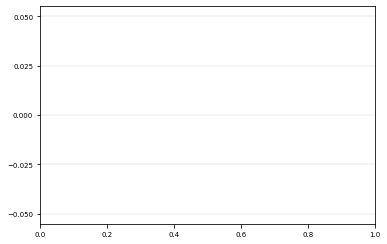

In [49]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

In [50]:
df1 = pd.read_csv('../../output_renewable/all0_90_85.csv')
df1= pd.read_csv('../../output_renewable/all_867_867.csv')
df2 = pd.read_csv('../../output_sig0/ces0.csv')
df2 = pd.read_csv('../../output/output_case3.csv')
df1 = df1[df1['region_scenario'] == 3]
df2 = df2[(df2['region_scenario'] == 3)]
df1['Qe1world_prime'] = df1['Qe1_prime'] + df1['Qe1star_prime']
df2.head()

,regionbase,tax_sce,region_scenario,tb,prop,te,varphi,pe,jxbar_prime,jmbar_prime,...,leakage3,chg_extraction,chg_production,chg_consumption,chg_Qeworld,pai_g,subsidy_ratio,welfare,welfare_noexternality,prop2
400,OECD37 as Home,Baseline,3,0.0,1.0,0.0,0.0,1.0,0.049234,0.819498,...,-0.102587,7.498559e-07,-0.000001,-2.027811e-07,-0.000002,-3.849407e-07,0.0,-0.000004,-0.000004,NaN
401,OECD37 as Home,Baseline,3,0.0,1.0,0.0,0.1,1.0,0.049234,0.819498,...,-0.102587,7.498559e-07,-0.000001,-2.027811e-07,-0.000002,-3.849407e-07,0.0,-0.000004,-0.000004,NaN
402,OECD37 as Home,Baseline,3,0.0,1.0,0.0,0.2,1.0,0.049234,0.819498,...,-0.102587,7.498559e-07,-0.000001,-2.027811e-07,-0.000002,-3.849407e-07,0.0,-0.000003,-0.000004,NaN
403,OECD37 as Home,Baseline,3,0.0,1.0,0.0,0.3,1.0,0.049234,0.819498,...,-0.102587,7.498559e-07,-0.000001,-2.027811e-07,-0.000002,-3.849407e-07,0.0,-0.000003,-0.000004,NaN
404,OECD37 as Home,Baseline,3,0.0,1.0,0.0,0.4,1.0,0.049234,0.819498,...,-0.102587,7.498559e-07,-0.000001,-2.027811e-07,-0.000002,-3.849407e-07,0.0,-0.000003,-0.000004,NaN


In [31]:
def plot_tax(fig, lodf, xlow = -35, xhigh = 0, ylow = 0, yhigh = 40, varphi = 20, x = 'welfare_noexternality', y = 'Qeworld_chg'):
    i=0
    for ax in fig.get_axes():
        ax.set_xlim(xlow,xhigh)
        ax.set_ylim(ylow,yhigh)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(True)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        
        df = lodf[i]
        i += 1

        df = df[df['varphi'] <= varphi]
        df_opt = df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
        df_opt['Qeworld_chg']=-(df_opt['Qe1world_prime']-df_opt['Qe1world_prime'].iat[0]) / df_opt['Qe1world_prime'].iat[0]
        #df['Qeworld_chg']=-(df['Qeworld_prime']-Qeworld)/Qeworld*100
        #x = 'varphi'
        #y = 'ratio'

        ##puretp
        df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##purete
        df_plot=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/ df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##puretc
        df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##production/consumption
        df_plot=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##extracion/production
        df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption
        df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (3,1), label = 'extraction-consumption')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        # #extraction/consumption/production
        df_plot=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==3)]
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l8, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-cons-prod')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

        ##unilateral optimal
        df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
        df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
        df_plot['ratio'] = np.array(df_plot['Qeworld_chg']) / np.array(df_opt['Qeworld_chg'])
        l7, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'unilateral optimal')
        dot=df_plot[df_plot['varphi']==2] #puretp
        ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

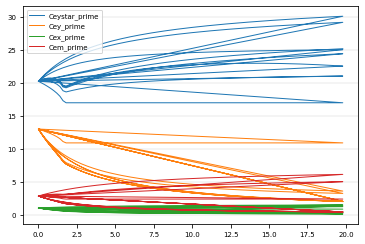

In [51]:
plt.plot(df1['varphi'],df1['Ceystar_prime'],linewidth=1, label = 'Ceystar_prime')
plt.plot(df1['varphi'],df1['Cey_prime'],linewidth=1, label = 'Cey_prime')
plt.plot(df1['varphi'],df1['Cex_prime'],linewidth=1, label = 'Cex_prime')
plt.plot(df1['varphi'],df1['Cem_prime'],linewidth=1, label = 'Cem_prime')
plt.legend()

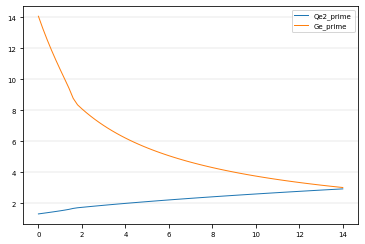

In [62]:
df_plot = df1[(df1['tax_sce'] == 'EPC_hybrid') & (df1['varphi'] <= 14)]
plt.plot(df_plot['varphi'],df_plot['Qe2_prime'],linewidth=1, label = 'Qe2_prime')
plt.plot(df_plot['varphi'],df_plot['Ge_prime'],linewidth=1, label = 'Ge_prime')
plt.legend()
df1 = df1[df1['varphi'] <= 14]
#plt.savefig(plot_root + '/all_qe_ge.pdf',format='pdf', bbox_inches = 'tight')

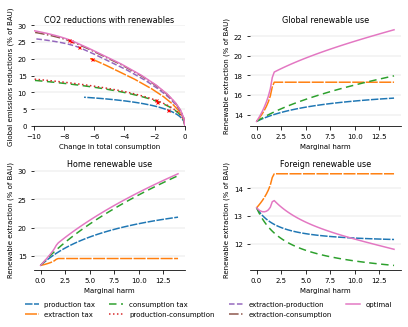

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

for ax in fig.get_axes():
    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

x = 'welfare_noexternality'
y = 'Qeworld_chg'
ax1.set_xlim(-10,0)
ax1.set_ylim(0,30)
##puretp
df_plot=df1[(df1['tax_sce']=='puretp') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
l1, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##purete
df_plot=df1[(df1['tax_sce']=='purete') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/ df_plot['Qe1world_prime'].iat[0] * 100
l2, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##puretc
df_plot=df1[(df1['tax_sce']=='puretc') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l3, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##production/consumption
df_plot=df1[(df1['tax_sce']=='PC_hybrid') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l4, = ax1.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##extracion/production
df_plot=df1[(df1['tax_sce']=='EP_hybrid')  & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l5, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# #extraction/consumption
df_plot=df1[(df1['tax_sce']=='EC_hybrid') & (df1['region_scenario']==3)]
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l6, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##unilateral optimal
df_plot=df1[(df1['tax_sce']=='Unilateral') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l7, = ax1.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##################World Renewable Use###########################
df1['Qe2world'] = df1['Qe2_prime'] + df1['Qe2star_prime']
df1['prop_qe2'] = df1['Qe2world'] / df1['Qeworld_prime'] * 100
x = 'varphi'
y = 'prop_qe2'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (8,1), label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,3), label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax2.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

##################Home Renewable Use###########################
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (8,1), label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,3), label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax3.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

##################Foreign Renewable Use###########################
df1['prop_energy_star'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy_star'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (8,1), label = 'extraction tax',color = 'C1')

df_plot = df1[df1['tax_sce'] == 'puretc']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,3), label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax4.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')


ylab1 = 'Global emissions reductions (% of BAU)'
xlab1 = 'Change in total consumption'
ax1.set_ylabel(ylab1)
ax1.set_xlabel(xlab1)
ax1.set_title('CO2 reductions with renewables',fontsize = 8, pad=3)

ylab2 = 'Renewable extraction (% of BAU)'
xlab2 = 'Marginal harm'
ax2.set_xlabel(xlab2)
ax2.set_ylabel(ylab2)
ax2.set_title('Global renewable use', fontsize = 8, pad = 3)

ylab3 = 'Renewable extraction (% of BAU)'
xlab3 = 'Marginal harm'
ax3.set_xlabel(xlab3)
ax3.set_ylabel(ylab3)
ax3.set_title('Home renewable use', fontsize = 8, pad = 3)

ylab4 = 'Renewable extraction (% of BAU)'
xlab4 = 'Marginal harm'
ax4.set_xlabel(xlab4)
ax4.set_ylabel(ylab4)
ax4.set_title('Foreign renewable use', fontsize = 8, pad = 3)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax3.legend(handles = [l1,l2,l3,l4,l5,l6,l7] , labels=labs,
           loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

#plt.suptitle("Effects of Renewables")
plt.savefig(plot_root + '/renewable_commonscale.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/renewable_commonscale.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)


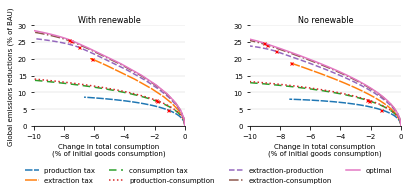

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])

for ax in fig.get_axes():
    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

x = 'welfare_noexternality'
y = 'Qeworld_chg'
ax1.set_xlim(-10,0)
ax1.set_ylim(0,30)
ax2.set_xlim(-10,0)
ax2.set_ylim(0,30)
##puretp
df_plot=df1[(df1['tax_sce']=='puretp') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
l1, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##purete
df_plot=df1[(df1['tax_sce']=='purete') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/ df_plot['Qe1world_prime'].iat[0] * 100
l2, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##puretc
df_plot=df1[(df1['tax_sce']=='puretc') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l3, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##production/consumption
df_plot=df1[(df1['tax_sce']=='PC_hybrid') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l4, = ax1.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##extracion/production
df_plot=df1[(df1['tax_sce']=='EP_hybrid')  & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l5, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# #extraction/consumption
df_plot=df1[(df1['tax_sce']=='EC_hybrid') & (df1['region_scenario']==3)]
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l6, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##unilateral optimal
df_plot=df1[(df1['tax_sce']=='Unilateral') & (df1['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
l7, = ax1.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
dot=df_plot[df_plot['varphi']==2] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

######################No Renewable###########################################
##puretp
df_plot=df2[(df2['tax_sce']=='puretp') & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
l1, = ax2.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##purete
df_plot=df2[(df2['tax_sce']=='purete') & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
l2, = ax2.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##puretc
df_plot=df2[(df2['tax_sce']=='puretc') & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
l3, = ax2.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##production/consumption
df_plot=df2[(df2['tax_sce']=='PC_hybrid') & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
l4, = ax2.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##extracion/production
df_plot=df2[(df2['tax_sce']=='EP_hybrid')  & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
l5, = ax2.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# #extraction/consumption
df_plot=df2[(df2['tax_sce']=='EC_hybrid') & (df2['region_scenario']==3)]
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
l6, = ax2.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

##unilateral optimal
df_plot=df2[(df2['tax_sce']=='Unilateral') & (df2['region_scenario']==3)] 
df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
l7, = ax2.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
dot=df_plot[df_plot['varphi']==2] #puretp
ax2.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

ylab1 = 'Global emissions reductions (% of BAU)'
xlab1 = 'Change in total consumption \n(% of initial goods consumption)'
ax1.set_ylabel(ylab1)
ax1.set_xlabel(xlab1)
ax1.set_title('With renewable',fontsize = 8, pad=3)

xlab2 = 'Change in total consumption \n(% of initial goods consumption)'
ax2.set_xlabel(xlab2)
ax2.set_title('No renewable', fontsize = 8, pad = 3)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax1.legend(handles = [l1,l2,l3,l4,l5,l6,l7] , labels=labs,
           loc='upper left', bbox_to_anchor=(-0.1, -0.35),fancybox=True, shadow=False, ncol=4, frameon=False)
plt.savefig(plot_root + '/renewable_comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/renewable_comparison.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

In [45]:
df_plot=df2[(df2['tax_sce']=='puretp') & (df2['region_scenario']==3)] 
#df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
df_plot['Qeworld_prime'].iat[1]

'32.130351510736915'

C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1375043098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['prop_energy'] = df_plot['Qe2_prime'] / df_plot['Qe_prime']* 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1375043098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['prop_energy_star'] = df_plot['Qe2star_prime'] / df_plot['Qestar_prime']* 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1375043098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

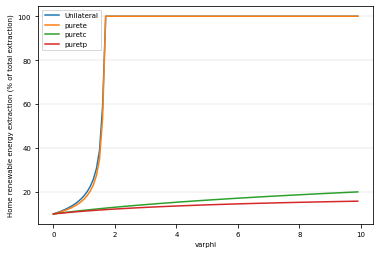

In [6]:
df_plot = df1[df1['tax_sce'] == 'Unilateral']
df_plot['prop_energy'] = df_plot['Qe2_prime'] / df_plot['Qe_prime']* 100
df_plot['prop_energy_star'] = df_plot['Qe2star_prime'] / df_plot['Qestar_prime']* 100
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'Unilateral')

df_plot = df1[df1['tax_sce'] == 'purete']
df_plot['prop_energy'] = df_plot['Qe2_prime'] / df_plot['Qe_prime']* 100
df_plot['prop_energy_star'] = df_plot['Qe2star_prime'] / df_plot['Qestar_prime']* 100
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'purete')

df_plot = df1[df1['tax_sce'] == 'puretc']
df_plot['prop_energy'] = df_plot['Qe2_prime'] / df_plot['Qe_prime']* 100
df_plot['prop_energy_star'] = df_plot['Qe2star_prime'] / df_plot['Qestar_prime']* 100
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretc')

df_plot = df1[df1['tax_sce'] == 'puretp']
df_plot['prop_energy'] = df_plot['Qe2_prime'] / df_plot['Qe_prime']* 100
df_plot['prop_energy_star'] = df_plot['Qe2star_prime'] / df_plot['Qestar_prime']* 100
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretp')

ylab = 'Renewable energy extraction (% of total extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_prop.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_prop.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


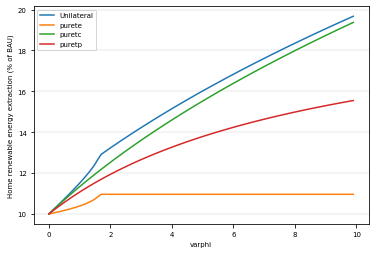

In [7]:
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'].iat[0] * 100

df_plot = df1[df1['tax_sce'] == 'Unilateral']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'Unilateral')

df_plot = df1[df1['tax_sce'] == 'purete']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'purete')

df_plot = df1[df1['tax_sce'] == 'puretc']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretc')

df_plot = df1[df1['tax_sce'] == 'puretp']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretp')

ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_prop_init.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_prop_init.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


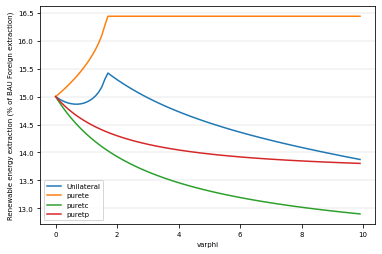

In [8]:
df1['prop_energy'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100

df_plot = df1[df1['tax_sce'] == 'Unilateral']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'Unilateral')

df_plot = df1[df1['tax_sce'] == 'purete']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'purete')

df_plot = df1[df1['tax_sce'] == 'puretc']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretc')

df_plot = df1[df1['tax_sce'] == 'puretp']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretp')

ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_prop_init_foreign.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_prop_init_foreign.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

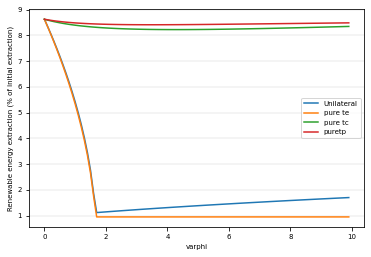

In [22]:
x = 'varphi'
y = 'Qe_prime'
df1['prop_energy'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100

df_plot = df1[df1['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df1[df1['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'pure te')

df_plot = df1[df1['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'pure tc')

df_plot = df1[df1['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
#plt.savefig(plot_root + '/basic_prop_init_foreign.pdf', format='pdf', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


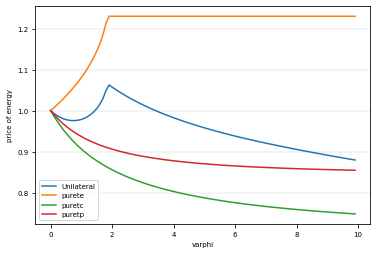

In [9]:
x = 'varphi'
y = 'pe'

df_plot = df2[df2['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df2[df2['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df2[df2['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df2[df2['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'price of energy'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/varphi_pe.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/varphi_pe.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


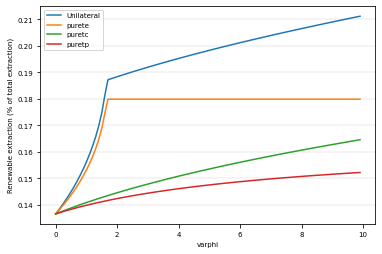

In [10]:
x = 'varphi'
y = 'prop_qe2'
df_temp = df1
df_temp['Qe2world'] = df_temp['Qe2_prime'] + df_temp['Qe2star_prime']
df_temp['prop_qe2'] = df_temp['Qe2world'] / df_temp['Qeworld_prime']

df_plot = df_temp[df_temp['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df_temp[df_temp['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df_temp[df_temp['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df_temp[df_temp['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'Renewable extraction (% of total extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_world_prop.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_world_prop.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


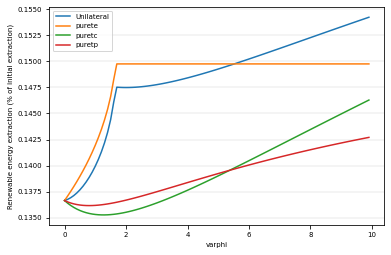

In [28]:
x = 'varphi'
y = 'prop_qe2'
df_temp = df1
df_temp['Qe2world'] = df_temp['Qe2_prime'] + df_temp['Qe2star_prime']
df_temp['prop_qe2'] = df_temp['Qe2world'] / df_temp['Qeworld_prime'].iat[0]

df_plot = df_temp[df_temp['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df_temp[df_temp['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df_temp[df_temp['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df_temp[df_temp['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_world_prop_init.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_world_prop_init.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


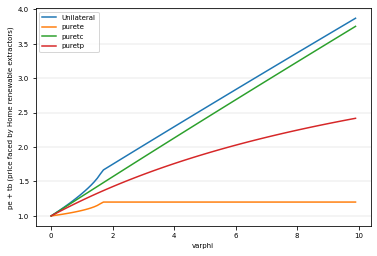

In [12]:
x = 'varphi'
y = 'petb'
df_temp = df1
df_temp['petb'] = df_temp['pe'] + df_temp['tb']

df_plot = df_temp[df_temp['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df_temp[df_temp['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df_temp[df_temp['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df_temp[df_temp['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'pe + tb (price faced by Home renewable extractors)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/varphi_petb.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/varphi_petb.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

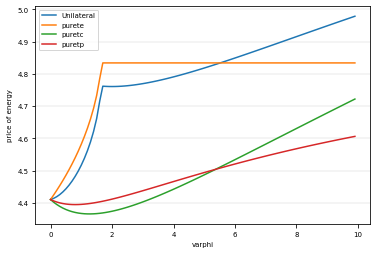

In [39]:
x = 'varphi'
y = 'Qe2world'
df_temp = df1
df_temp['Qe2world'] = df_temp['Qe2_prime'] + df_temp['Qe2star_prime']
df_temp['prop_qe2'] = df_temp['Qe2world'] / df_temp['Qeworld_prime'].iat[0]

df_plot = df_temp[df_temp['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df_temp[df_temp['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df_temp[df_temp['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df_temp[df_temp['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'price of energy'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()

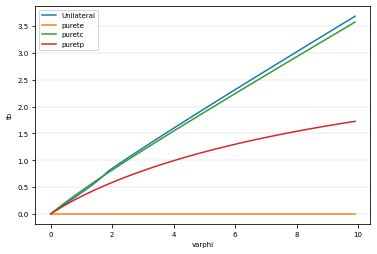

In [28]:
x = 'varphi'
y = 'tb'

df_plot = df2[df2['tax_sce'] == 'Unilateral']
plt.plot(df_plot[x], df_plot[y], label = 'Unilateral')

df_plot = df2[df2['tax_sce'] == 'purete']
plt.plot(df_plot[x], df_plot[y], label = 'purete')

df_plot = df2[df2['tax_sce'] == 'puretc']
plt.plot(df_plot[x], df_plot[y], label = 'puretc')

df_plot = df2[df2['tax_sce'] == 'puretp']
plt.plot(df_plot[x], df_plot[y], label = 'puretp')

ylab = 'tb'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/varphi_tb.pdf', format='pdf', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


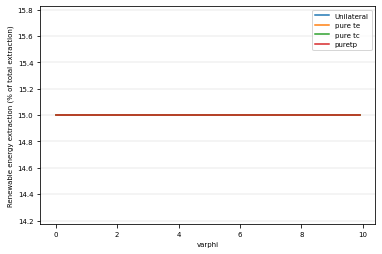

In [29]:
df1['prop_energy'] = df1['Qe2star_prime'] / df1['Qestar_prime'] * 100

df_plot = df1[df1['tax_sce'] == 'Unilateral']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'Unilateral')

df_plot = df1[df1['tax_sce'] == 'purete']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'pure te')

df_plot = df1[df1['tax_sce'] == 'puretc']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'pure tc')

df_plot = df1[df1['tax_sce'] == 'puretp']
plt.plot(df_plot['varphi'], df_plot['prop_energy'], label = 'puretp')

ylab = 'Renewable energy extraction (% of total extraction)'
xlab = 'varphi'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
plt.savefig(plot_root + '/basic_prop_foreign.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/basic_prop_foreign.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['Qeworld_chg']=-(df_opt['Qe1world_prime']-df_opt['Qe1world_prime'].iat[0]) / df_opt['Qe1world_prime'].iat[0]
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_125

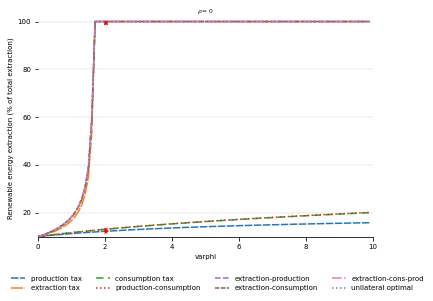

In [16]:
x = 'varphi'
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'] * 100
fig, (ax1) = plt.subplots(1, 1)
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = 0, xhigh =10, ylow=10, yhigh = 101, varphi = 10, y = 'prop_energy', x = 'varphi')
ylab = 'Renewable energy extraction (% of total extraction)'
xlab = 'varphi'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0$", fontsize=6)


plt.legend(loc = 'upper left', bbox_to_anchor=(-0.1, -0.15),fancybox=True, ncol = 4, shadow=False,frameon=False)
plt.savefig(plot_root + '/all_prop.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/all_prop.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['Qeworld_chg']=-(df_opt['Qe1world_prime']-df_opt['Qe1world_prime'].iat[0]) / df_opt['Qe1world_prime'].iat[0]
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_125

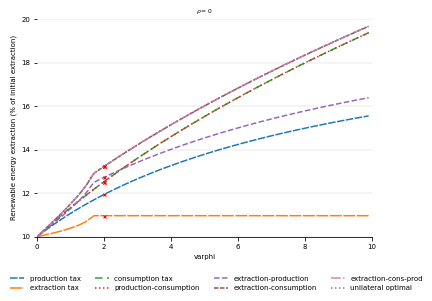

In [17]:
x = 'varphi'
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'].iat[0] * 100
fig, (ax1) = plt.subplots(1, 1)
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = 0, xhigh =10, ylow=10, yhigh = 20, varphi = 10, y = 'prop_energy', x = 'varphi')
ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0$", fontsize=6)


plt.legend(loc = 'upper left', bbox_to_anchor=(-0.1, -0.15),fancybox=True, ncol = 4, shadow=False,frameon=False)
plt.savefig(plot_root + '/all_prop_init.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/all_prop_init.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['Qeworld_chg']=-(df_opt['Qe1world_prime']-df_opt['Qe1world_prime'].iat[0]) / df_opt['Qe1world_prime'].iat[0]
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_125

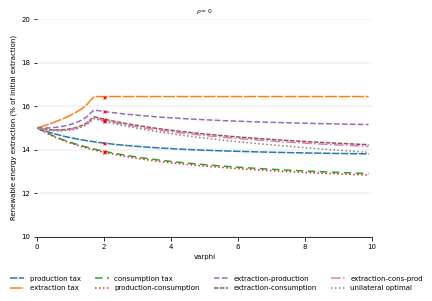

In [20]:
x = 'varphi'
df1['prop_energy'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100
fig, (ax1) = plt.subplots(1, 1)
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = 0, xhigh =10, ylow=10, yhigh = 20, varphi = 10, y = 'prop_energy', x = 'varphi')
ylab = 'Renewable energy extraction (% of initial extraction)'
xlab = 'varphi'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0$", fontsize=6)


plt.legend(loc = 'upper left', bbox_to_anchor=(-0.1, -0.15),fancybox=True, ncol = 4, shadow=False,frameon=False)
plt.savefig(plot_root + '/all_prop_init_foreign.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/all_prop_init_foreign.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

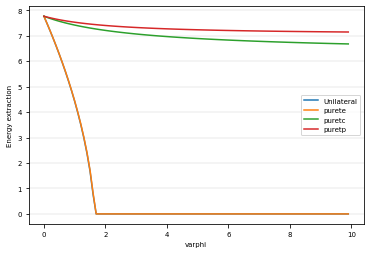

In [83]:
x = 'varphi'

df_plot = df1[df1['tax_sce']== 'Unilateral']
plt.plot(df_plot[x], df_plot['Qe1_prime'], label= 'Unilateral')

df_plot = df1[df1['tax_sce']== 'purete']
#plt.plot(df_plot[x], df_plot['prop_energy'], label = 'Home (high eps)')
plt.plot(df_plot[x], df_plot['Qe1_prime'], label ='purete')

df_plot = df1[df1['tax_sce']== 'puretc']
plt.plot(df_plot[x], df_plot['Qe1_prime'], label= 'puretc')

df_plot = df1[df1['tax_sce']== 'puretp']
plt.plot(df_plot[x], df_plot['Qe1_prime'], label= 'puretp')

ylab = 'Energy extraction'
xlab = 'varphi'
#plt.xlim(-10,0)
#plt.ylim(0,0.5)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()
#plt.savefig(plot_root + '/varphi_qe.pdf', format='pdf', bbox_inches = 'tight')

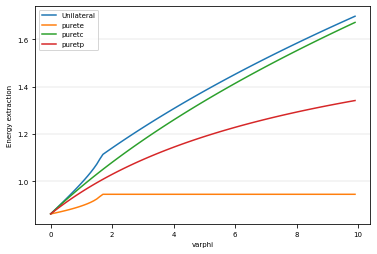

In [82]:
x = 'varphi'

df_plot = df1[df1['tax_sce']== 'Unilateral']
plt.plot(df_plot[x], df_plot['Qe2_prime'], label= 'Unilateral')

df_plot = df1[df1['tax_sce']== 'purete']
#plt.plot(df_plot[x], df_plot['prop_energy'], label = 'Home (high eps)')
plt.plot(df_plot[x], df_plot['Qe2_prime'], label ='purete')

df_plot = df1[df1['tax_sce']== 'puretc']
plt.plot(df_plot[x], df_plot['Qe2_prime'], label= 'puretc')

df_plot = df1[df1['tax_sce']== 'puretp']
plt.plot(df_plot[x], df_plot['Qe2_prime'], label= 'puretp')

df_plot = df1[df1['tax_sce']== 'EPC_hybrid']
#plt.plot(df_plot[x], df_plot['Qe2_prime'], label= 'EPC_hybrid')

ylab = 'Energy extraction'
xlab = 'varphi'
#plt.xlim(-10,0)
#plt.ylim(0,0.5)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend()

C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opt['Qeworld_chg']=-(df_opt['Qe1world_prime']-df_opt['Qe1world_prime'].iat[0]) / df_opt['Qe1world_prime'].iat[0]
C:\Users\Alex\AppData\Local\Temp/ipykernel_12532/1131081339.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
C:\Users\Alex\AppData\Local\Temp/ipykernel_125

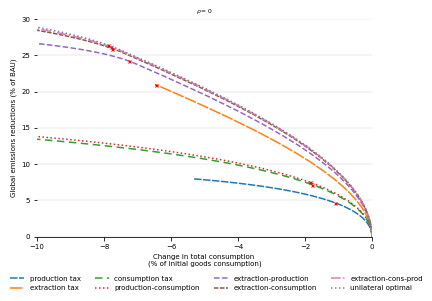

In [19]:
fig, (ax1) = plt.subplots(1, 1)
#ax2.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle = 'solid', label = 'global planner', color = "purple")

plot_tax(fig, [df1], xlow = -10, xhigh =0, yhigh = 30, varphi = 20)
ylab = 'Global emissions reductions (% of BAU)'
xlab = 'Change in total consumption \n(% of initial goods consumption)'
#ylab = 'Global emissions reduction (% of BAU)'
#xlab = 'varphi'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax1.set_title(r"$\rho = 0$", fontsize=6)


plt.legend(loc = 'upper left', bbox_to_anchor=(-0.1, -0.15),fancybox=True, ncol = 4, shadow=False,frameon=False)
plt.savefig(plot_root + '/all_fig4.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + '/all_fig4.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)